In [154]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from bs4 import BeautifulSoup as bs
import requests

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [2]:
link = 'https://www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/'
response = requests.get(link)
html = response.text

In [3]:
soup = bs(html)

In [4]:
names = soup.find_all('a',{"class":""})
stormevent_details_all = []

# For loop to get all the names
# Reference code from https://medium.com/@yves.jacquot/predicting-tornado-magnitude-with-machine-learning-c76df84d7872
for name in names[7:-2]:
        #print(name)
    #getting only the files with storm events
    if name.attrs['href'].startswith('StormEvents_details'):
        filename = name.attrs['href']
        storm_url = link+filename
        #print(storm_url)
        
        iter_csv = pd.read_csv(storm_url, compression='gzip', iterator=True, chunksize=1000)
        stormevent_details_all.append(pd.concat([chunk[chunk['EVENT_TYPE'].map(lambda x: x.lower())
                                                        == 'tornado'] for chunk in iter_csv], ignore_index=True))
        
combined_tornado_df = pd.concat(stormevent_details_all)


In [5]:
combined_tornado_df.head()


,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,195004,28,1445,195004,28,1445,NaN,10096222,OKLAHOMA,40.0,...,0.0,NaN,NaN,35.12,-99.20,35.17,-99.20,NaN,NaN,PUB
1,195004,29,1530,195004,29,1530,NaN,10120412,TEXAS,48.0,...,0.0,NaN,NaN,31.90,-98.60,31.73,-98.60,NaN,NaN,PUB
2,195007,5,1800,195007,5,1800,NaN,10104927,PENNSYLVANIA,42.0,...,0.0,NaN,NaN,40.58,-75.70,40.65,-75.47,NaN,NaN,PUB
3,195007,5,1830,195007,5,1830,NaN,10104928,PENNSYLVANIA,42.0,...,0.0,NaN,NaN,40.60,-76.75,NaN,NaN,NaN,NaN,PUB
4,195007,24,1440,195007,24,1440,NaN,10104929,PENNSYLVANIA,42.0,...,0.0,NaN,NaN,41.63,-79.68,NaN,NaN,NaN,NaN,PUB


In [235]:
combined_tornado_df = pd.read_csv('data_sets/tornado_data_1950to2020.csv', low_memory=False)

In [236]:
combined_tornado_df.fillna(0,inplace=True)
combined_tornado_df=combined_tornado_df.drop(columns=['Unnamed: 0'], axis=1)
combined_tornado_df.head()


,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,195004,28,1445,195004,28,1445,0.0,10096222,OKLAHOMA,40.0,...,0.0,0,0,35.12,-99.20,35.17,-99.20,0,0,PUB
1,195004,29,1530,195004,29,1530,0.0,10120412,TEXAS,48.0,...,0.0,0,0,31.90,-98.60,31.73,-98.60,0,0,PUB
2,195007,5,1800,195007,5,1800,0.0,10104927,PENNSYLVANIA,42.0,...,0.0,0,0,40.58,-75.70,40.65,-75.47,0,0,PUB
3,195007,5,1830,195007,5,1830,0.0,10104928,PENNSYLVANIA,42.0,...,0.0,0,0,40.60,-76.75,0.00,0.00,0,0,PUB
4,195007,24,1440,195007,24,1440,0.0,10104929,PENNSYLVANIA,42.0,...,0.0,0,0,41.63,-79.68,0.00,0.00,0,0,PUB


In [237]:
combined_tornado_df.dtypes

BEGIN_YEARMONTH         int64
BEGIN_DAY               int64
BEGIN_TIME              int64
END_YEARMONTH           int64
END_DAY                 int64
END_TIME                int64
EPISODE_ID            float64
EVENT_ID                int64
STATE                  object
STATE_FIPS            float64
YEAR                    int64
MONTH_NAME             object
EVENT_TYPE             object
CZ_TYPE                object
CZ_FIPS                 int64
CZ_NAME                object
WFO                    object
BEGIN_DATE_TIME        object
CZ_TIMEZONE            object
END_DATE_TIME          object
INJURIES_DIRECT         int64
INJURIES_INDIRECT       int64
DEATHS_DIRECT           int64
DEATHS_INDIRECT         int64
DAMAGE_PROPERTY        object
DAMAGE_CROPS           object
SOURCE                 object
MAGNITUDE             float64
MAGNITUDE_TYPE         object
FLOOD_CAUSE           float64
CATEGORY              float64
TOR_F_SCALE            object
TOR_LENGTH            float64
TOR_WIDTH 

In [238]:
tornado_ef = combined_tornado_df[['BEGIN_YEARMONTH','STATE_FIPS','BEGIN_TIME','TOR_F_SCALE','STATE','CZ_NAME','TOR_LENGTH','TOR_WIDTH']].copy()
tornado_ef

,BEGIN_YEARMONTH,STATE_FIPS,BEGIN_TIME,TOR_F_SCALE,STATE,CZ_NAME,TOR_LENGTH,TOR_WIDTH
0,195004,40.0,1445,F3,OKLAHOMA,WASHITA,3.40,400.0
1,195004,48.0,1530,F1,TEXAS,COMANCHE,11.50,200.0
2,195007,42.0,1800,F2,PENNSYLVANIA,LEHIGH,12.90,33.0
3,195007,42.0,1830,F2,PENNSYLVANIA,DAUPHIN,0.00,13.0
4,195007,42.0,1440,F0,PENNSYLVANIA,CRAWFORD,0.00,33.0
...,...,...,...,...,...,...,...,...
72688,202103,48.0,1548,EF1,TEXAS,RANDALL,6.61,800.0
72689,202103,48.0,1832,EFU,TEXAS,BOSQUE,0.53,50.0
72690,202103,22.0,1908,EF1,LOUISIANA,DE SOTO,2.16,400.0
72691,202103,48.0,1604,EF1,TEXAS,ARMSTRONG,1.55,800.0


In [239]:
tornado_ef.to_csv('data_sets/tornado_ef.csv', index=False)

In [240]:
tornado_ef.head()

,BEGIN_YEARMONTH,STATE_FIPS,BEGIN_TIME,TOR_F_SCALE,STATE,CZ_NAME,TOR_LENGTH,TOR_WIDTH
0,195004,40.0,1445,F3,OKLAHOMA,WASHITA,3.4,400.0
1,195004,48.0,1530,F1,TEXAS,COMANCHE,11.5,200.0
2,195007,42.0,1800,F2,PENNSYLVANIA,LEHIGH,12.9,33.0
3,195007,42.0,1830,F2,PENNSYLVANIA,DAUPHIN,0.0,13.0
4,195007,42.0,1440,F0,PENNSYLVANIA,CRAWFORD,0.0,33.0


In [241]:
tornado_ef['BEGIN_YEARMONTH'] = pd.to_datetime(tornado_ef['BEGIN_YEARMONTH'], format='%Y%m')
tornado_ef.head()

,BEGIN_YEARMONTH,STATE_FIPS,BEGIN_TIME,TOR_F_SCALE,STATE,CZ_NAME,TOR_LENGTH,TOR_WIDTH
0,1950-04-01,40.0,1445,F3,OKLAHOMA,WASHITA,3.4,400.0
1,1950-04-01,48.0,1530,F1,TEXAS,COMANCHE,11.5,200.0
2,1950-07-01,42.0,1800,F2,PENNSYLVANIA,LEHIGH,12.9,33.0
3,1950-07-01,42.0,1830,F2,PENNSYLVANIA,DAUPHIN,0.0,13.0
4,1950-07-01,42.0,1440,F0,PENNSYLVANIA,CRAWFORD,0.0,33.0


In [243]:
tornado_time = tornado_ef[['BEGIN_YEARMONTH','STATE_FIPS','BEGIN_TIME']].copy()
tornado_time

,BEGIN_YEARMONTH,STATE_FIPS,BEGIN_TIME
0,1950-04-01,40.0,1445
1,1950-04-01,48.0,1530
2,1950-07-01,42.0,1800
3,1950-07-01,42.0,1830
4,1950-07-01,42.0,1440
...,...,...,...
72688,2021-03-01,48.0,1548
72689,2021-03-01,48.0,1832
72690,2021-03-01,22.0,1908
72691,2021-03-01,48.0,1604


In [244]:
tornado_simple = tornado_time[['BEGIN_YEARMONTH','STATE_FIPS']].copy()
tornado_simple

,BEGIN_YEARMONTH,STATE_FIPS
0,1950-04-01,40.0
1,1950-04-01,48.0
2,1950-07-01,42.0
3,1950-07-01,42.0
4,1950-07-01,42.0
...,...,...
72688,2021-03-01,48.0
72689,2021-03-01,48.0
72690,2021-03-01,22.0
72691,2021-03-01,48.0


In [245]:
per = tornado_simple.BEGIN_YEARMONTH.dt.to_period("M")
tornado_count = tornado_simple.groupby([per,'STATE_FIPS']).count()
tornado_count.rename(columns={'BEGIN_YEARMONTH':'COUNT'}, inplace=True)
tornado_count = tornado_count.reset_index()
tornado_count

#tornado_count = tornado_count.drop(columns=['MONTH_NAME','TOR_F_SCALE','CZ_NAME','TOR_LENGTH','TOR_WIDTH'], axis=1)
# tornado_count = tornado_count.reset_index()
# tornado_count.shape
# # tornado_count.dtypes
# tornado_count.head(50)
# #tornado_count.shape

,BEGIN_YEARMONTH,STATE_FIPS,COUNT
0,1950-01,5.0,1
1,1950-01,17.0,3
2,1950-01,29.0,2
3,1950-01,39.0,1
4,1950-01,48.0,1
...,...,...,...
13086,2021-05,47.0,25
13087,2021-05,48.0,42
13088,2021-05,51.0,2
13089,2021-05,54.0,1


In [246]:
tornado_count.iloc[:,0].head()

0    1950-01
1    1950-01
2    1950-01
3    1950-01
4    1950-01
Name: BEGIN_YEARMONTH, dtype: period[M]

In [247]:
tornado_count['month'] = tornado_count.iloc[:,0].dt.strftime('%m')
tornado_count.rename(columns={'BEGIN_YEARMONTH':'date'},inplace=True)
tornado_count.head()

,date,STATE_FIPS,COUNT,month
0,1950-01,5.0,1,01
1,1950-01,17.0,3,01
2,1950-01,29.0,2,01
3,1950-01,39.0,1,01
4,1950-01,48.0,1,01


In [248]:
#monthly = monthly.reset_index()
tornado_time['BEGIN_YEARMONTH'] = tornado_time['BEGIN_YEARMONTH'].apply(lambda x: x.strftime('%Y-%m'))
#tornado_time.set_index('BEGIN_YEARMONTH', inplace=True)
# tornado_time['BEGIN_YEARMONTH'] = pd.to_datetime(tornado_time['BEGIN_YEARMONTH'], format='%Y%m')
# tornado_time.BEGIN_YEARMONTH.dt.to_period("M")
tornado_time.rename(columns={'BEGIN_YEARMONTH':'date'},inplace=True)
tornado_time['date'] = pd.to_datetime(tornado_time['date']).dt.to_period("M")
tornado_time.head()

,date,STATE_FIPS,BEGIN_TIME
0,1950-04,40.0,1445
1,1950-04,48.0,1530
2,1950-07,42.0,1800
3,1950-07,42.0,1830
4,1950-07,42.0,1440


In [249]:
print(tornado_time.dtypes)
tornado_count.dtypes

date          period[M]
STATE_FIPS      float64
BEGIN_TIME        int64
dtype: object


date          period[M]
STATE_FIPS      float64
COUNT             int64
month            object
dtype: object

In [250]:
tornado_time.rename(columns={'BEGIN_YEARMONTH':'date'},inplace=True)
tornado_time.head()

,date,STATE_FIPS,BEGIN_TIME
0,1950-04,40.0,1445
1,1950-04,48.0,1530
2,1950-07,42.0,1800
3,1950-07,42.0,1830
4,1950-07,42.0,1440


In [251]:
final_tornado = tornado_time.merge(tornado_count,how='left',on=['date','STATE_FIPS'])
final_tornado.head(10)

,date,STATE_FIPS,BEGIN_TIME,COUNT,month
0,1950-04,40.0,1445,7,04
1,1950-04,48.0,1530,2,04
2,1950-07,42.0,1800,3,07
3,1950-07,42.0,1830,3,07
4,1950-07,42.0,1440,3,07
5,1950-08,42.0,1600,1,08
6,1950-11,42.0,1700,2,11
7,1950-11,42.0,1730,2,11
8,1950-09,40.0,1745,2,09
9,1950-09,40.0,130,2,09


In [252]:
final_tornado.dtypes

date          period[M]
STATE_FIPS      float64
BEGIN_TIME        int64
COUNT             int64
month            object
dtype: object

In [255]:
final_tornado = final_tornado.astype({'BEGIN_TIME':float,'COUNT':float,'month':float})
final_tornado.dtypes

date          period[M]
STATE_FIPS      float64
BEGIN_TIME      float64
COUNT           float64
month           float64
dtype: object

In [256]:
final_tornado.shape

(72693, 5)

In [257]:
final_tornado.iloc[:,1:5].head()

,STATE_FIPS,BEGIN_TIME,COUNT,month
0,40.0,1445.0,7.0,4.0
1,48.0,1530.0,2.0,4.0
2,42.0,1800.0,3.0,7.0
3,42.0,1830.0,3.0,7.0
4,42.0,1440.0,3.0,7.0


In [258]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [259]:
train_features = final_tornado.iloc[:,1:5].sample(frac=0.8, random_state=0)
test_features = final_tornado.iloc[:,1:5].drop(train_features.index)
print(train_features.shape)
print(test_features.shape)
#test_features.head()

#sample_train = train_features.copy()
#sample_test = test_features.copy()
train_labels = train_features.pop('COUNT')
test_labels = test_features.pop('COUNT')

print(train_labels.shape)
test_labels.shape

test_features.shape

(58154, 4)
(14539, 4)
(58154,)


(14539, 3)

In [260]:
train_labels

55568      3.0
63010      5.0
35905     88.0
70044      2.0
37453      2.0
         ...  
31623      5.0
15233      1.0
59657    174.0
66277     20.0
37444     30.0
Name: COUNT, Length: 58154, dtype: float64

In [261]:
test_labels

5         1.0
10        1.0
13        1.0
20       12.0
21       12.0
         ... 
72676    32.0
72677     4.0
72679    32.0
72680    32.0
72681     7.0
Name: COUNT, Length: 14539, dtype: float64

In [262]:
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

In [263]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_9 (Normalizati (None, 3)                 7         
_________________________________________________________________
dense_27 (Dense)             (None, 64)                256       
_________________________________________________________________
dense_28 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 65        
Total params: 4,488
Trainable params: 4,481
Non-trainable params: 7
_________________________________________________________________


In [264]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_data=(test_features, test_labels),
    verbose=0, epochs=100)

Wall time: 1min 12s


In [265]:
test_predictions = dnn_model.predict(test_features).flatten()
print(test_predictions.shape)
print(test_predictions)
print(test_labels.shape)
test_labels

(14539,)
[ 5.5873184  7.849844   4.565363  ... 17.396505  16.31744   12.261515 ]
(14539,)


5         1.0
10        1.0
13        1.0
20       12.0
21       12.0
         ... 
72676    32.0
72677     4.0
72679    32.0
72680    32.0
72681     7.0
Name: COUNT, Length: 14539, dtype: float64

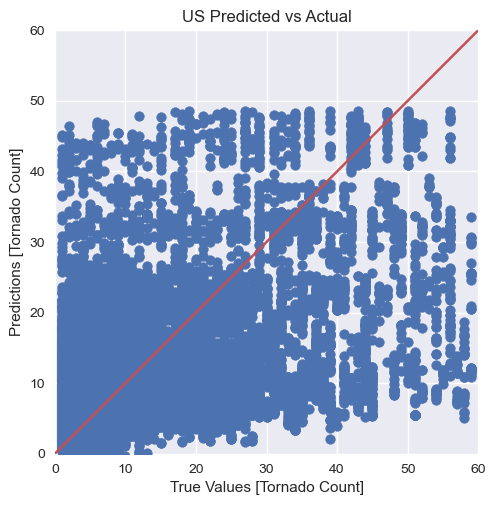

In [267]:
plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Tornado Count]')
plt.ylabel('Predictions [Tornado Count]')

lims = [0, 60]
plt.xlim(lims)
plt.ylim(lims)
mpl.style.use('seaborn')
plt.title('US Predicted vs Actual')
_ = plt.plot(lims, lims, 'C2')
plt.savefig('data_sets/conus_predicted_tornados.png')
plt.show()

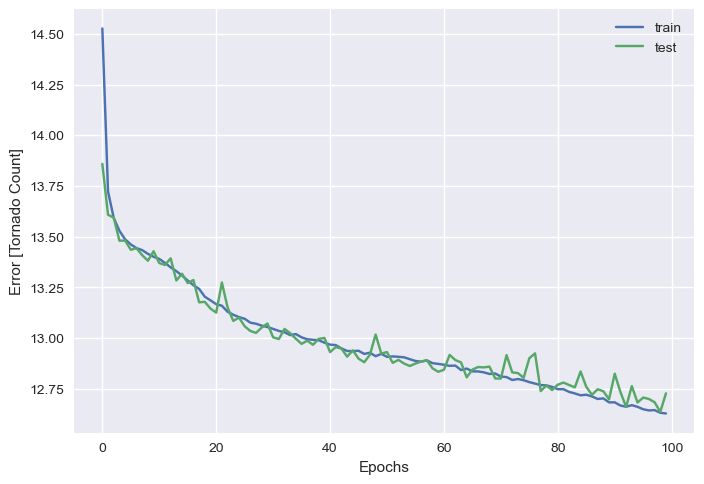

In [269]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Error [Tornado Count]')
mpl.style.use('seaborn')
plt.savefig('data_sets/tornado_accuracy.png')
plt.show()

In [281]:
len(test_labels)
len(test_predictions)
final_tornado.shape

14539

In [274]:
test_list = list(test_predictions)


In [275]:
df = pd.DataFrame(test_list, columns=['predictions'])
df.head()
df.shape

(14539, 1)

In [282]:
#final_tornado.insert(loc=2, column='Prediction',value=test_list)
final_tornado.head()

,date,STATE_FIPS,BEGIN_TIME,COUNT,month
0,1950-04,40.0,1445.0,7.0,4.0
1,1950-04,48.0,1530.0,2.0,4.0
2,1950-07,42.0,1800.0,3.0,7.0
3,1950-07,42.0,1830.0,3.0,7.0
4,1950-07,42.0,1440.0,3.0,7.0


In [233]:
tornado_count.to_csv('data_sets/tornado_final.csv', index=False)

2011-04    1020
2003-05     646
2019-05     584
2008-05     563
2004-05     543
           ... 
1958-12       1
1952-09       1
2010-02       1
1976-12       1
1981-12       1
Freq: M, Name: date, Length: 850, dtype: int64